In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from ast import literal_eval
from sklearn import preprocessing

In [76]:
keywords_df = pd.read_csv('../data/clean/clean_keywords.csv')
credits_df = pd.read_csv('../data/clean/clean_credits.csv')
movies_metadata_df = pd.read_csv('../data/clean/clean_movies_metadata.csv')

In [77]:
df=(credits_df.merge(movies_metadata_df,on='id')).merge(keywords_df,on='id')

In [78]:
combine_data_df = df

In [79]:
combine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31641 entries, 0 to 31640
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x           31641 non-null  int64  
 1   cast                   30752 non-null  object 
 2   id                     31641 non-null  int64  
 3   director               31508 non-null  object 
 4   Unnamed: 0_y           31641 non-null  int64  
 5   belongs_to_collection  31641 non-null  int64  
 6   budget                 7815 non-null   float64
 7   genres                 31641 non-null  object 
 8   original_language      31641 non-null  object 
 9   popularity             31641 non-null  float64
 10  production_companies   31641 non-null  object 
 11  production_countries   31641 non-null  object 
 12  release_date           31641 non-null  object 
 13  revenue                6838 non-null   float64
 14  runtime                31641 non-null  float64
 15  st

In [80]:
combine_data_df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
combine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31641 entries, 0 to 31640
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   30752 non-null  object 
 1   id                     31641 non-null  int64  
 2   director               31508 non-null  object 
 3   belongs_to_collection  31641 non-null  int64  
 4   budget                 7815 non-null   float64
 5   genres                 31641 non-null  object 
 6   original_language      31641 non-null  object 
 7   popularity             31641 non-null  float64
 8   production_companies   31641 non-null  object 
 9   production_countries   31641 non-null  object 
 10  release_date           31641 non-null  object 
 11  revenue                6838 non-null   float64
 12  runtime                31641 non-null  float64
 13  status                 31641 non-null  object 
 14  title                  31641 non-null  object 
 15  vo

In [81]:
combine_data_df.drop(['release_date', 'weighted_rating'], axis=1, inplace=True)

In [82]:
combine_data_df.head(n=3)

,cast,id,director,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,status,title,vote_average,vote_count,release_year,profit,keywords
0,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",862,John Lasseter,1,0.078947,"['Animation', 'Comedy', 'Family']",en,21.946943,['Pixar Animation Studios'],['United States of America'],0.983037,81.0,Released,Toy Story,7.7,5415.0,1995.0,0.904090,"['new toy', 'boy next door', 'toy comes to lif..."
1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",8844,Joe Johnston,0,0.171053,"['Adventure', 'Fantasy', 'Family']",en,17.015540,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],0.691572,104.0,Released,Jumanji,6.9,2413.0,1995.0,0.520519,"['recluse', 'board game', 'new home', 'giant i..."
2,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",15602,Howard Deutch,1,NaN,"['Romance', 'Comedy']",en,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],NaN,101.0,Released,Grumpier Old Men,6.5,92.0,1995.0,NaN,"['fishing', 'best friend', 'duringcreditssting..."


In [83]:
combine_data_df.drop(['belongs_to_collection'], axis=1, inplace=True)

In [84]:
combine_data_df[combine_data_df['release_year'] == 'Released'].index

Int64Index([22887, 23260, 23809, 24141, 28359, 28658, 29020, 29879, 30638,
            31639],
           dtype='int64')

In [85]:
combine_data_df.drop(combine_data_df[combine_data_df['release_year'] == 'Released'].index,
                    inplace=True)
combine_data_df['release_year'] = combine_data_df['release_year'].astype('float64').astype('int64')

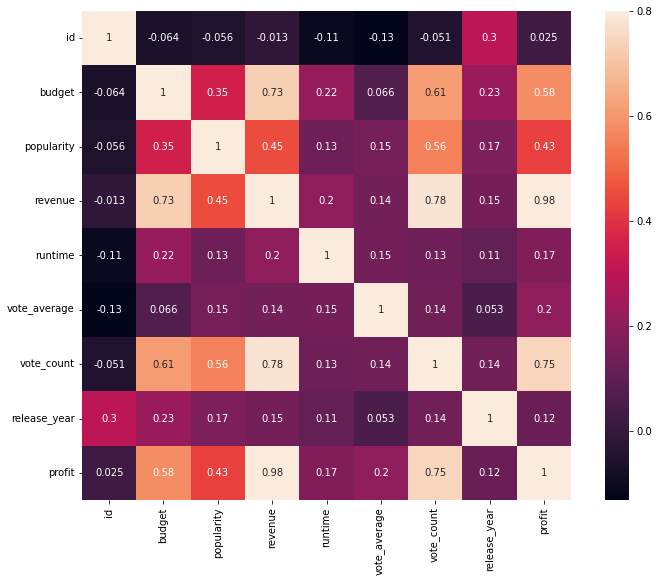

In [86]:
corrmat = combine_data_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [87]:
combine_data_df.dropna(subset=['cast', 'director'],inplace=True)
cat_features = ['production_companies', 'genres', 'cast', 'production_countries' , 'keywords']
for feature in cat_features:
    combine_data_df[feature] = combine_data_df[feature].apply(lambda x: literal_eval(x))
cat_features.append('director')

In [88]:
def get_cat_feature_heat_map(cat_feature): 
    data = combine_data_df.explode(cat_feature)
    target_enc = ce.TargetEncoder(cols=cat_feature)
    target_enc.fit(data[cat_feature], data['id'])
    data = data.join(target_enc.transform(data[cat_feature]).add_suffix('_target'))
    data = data.groupby(cat_feature).median()
    corrmat = data.corr()
    return corrmat

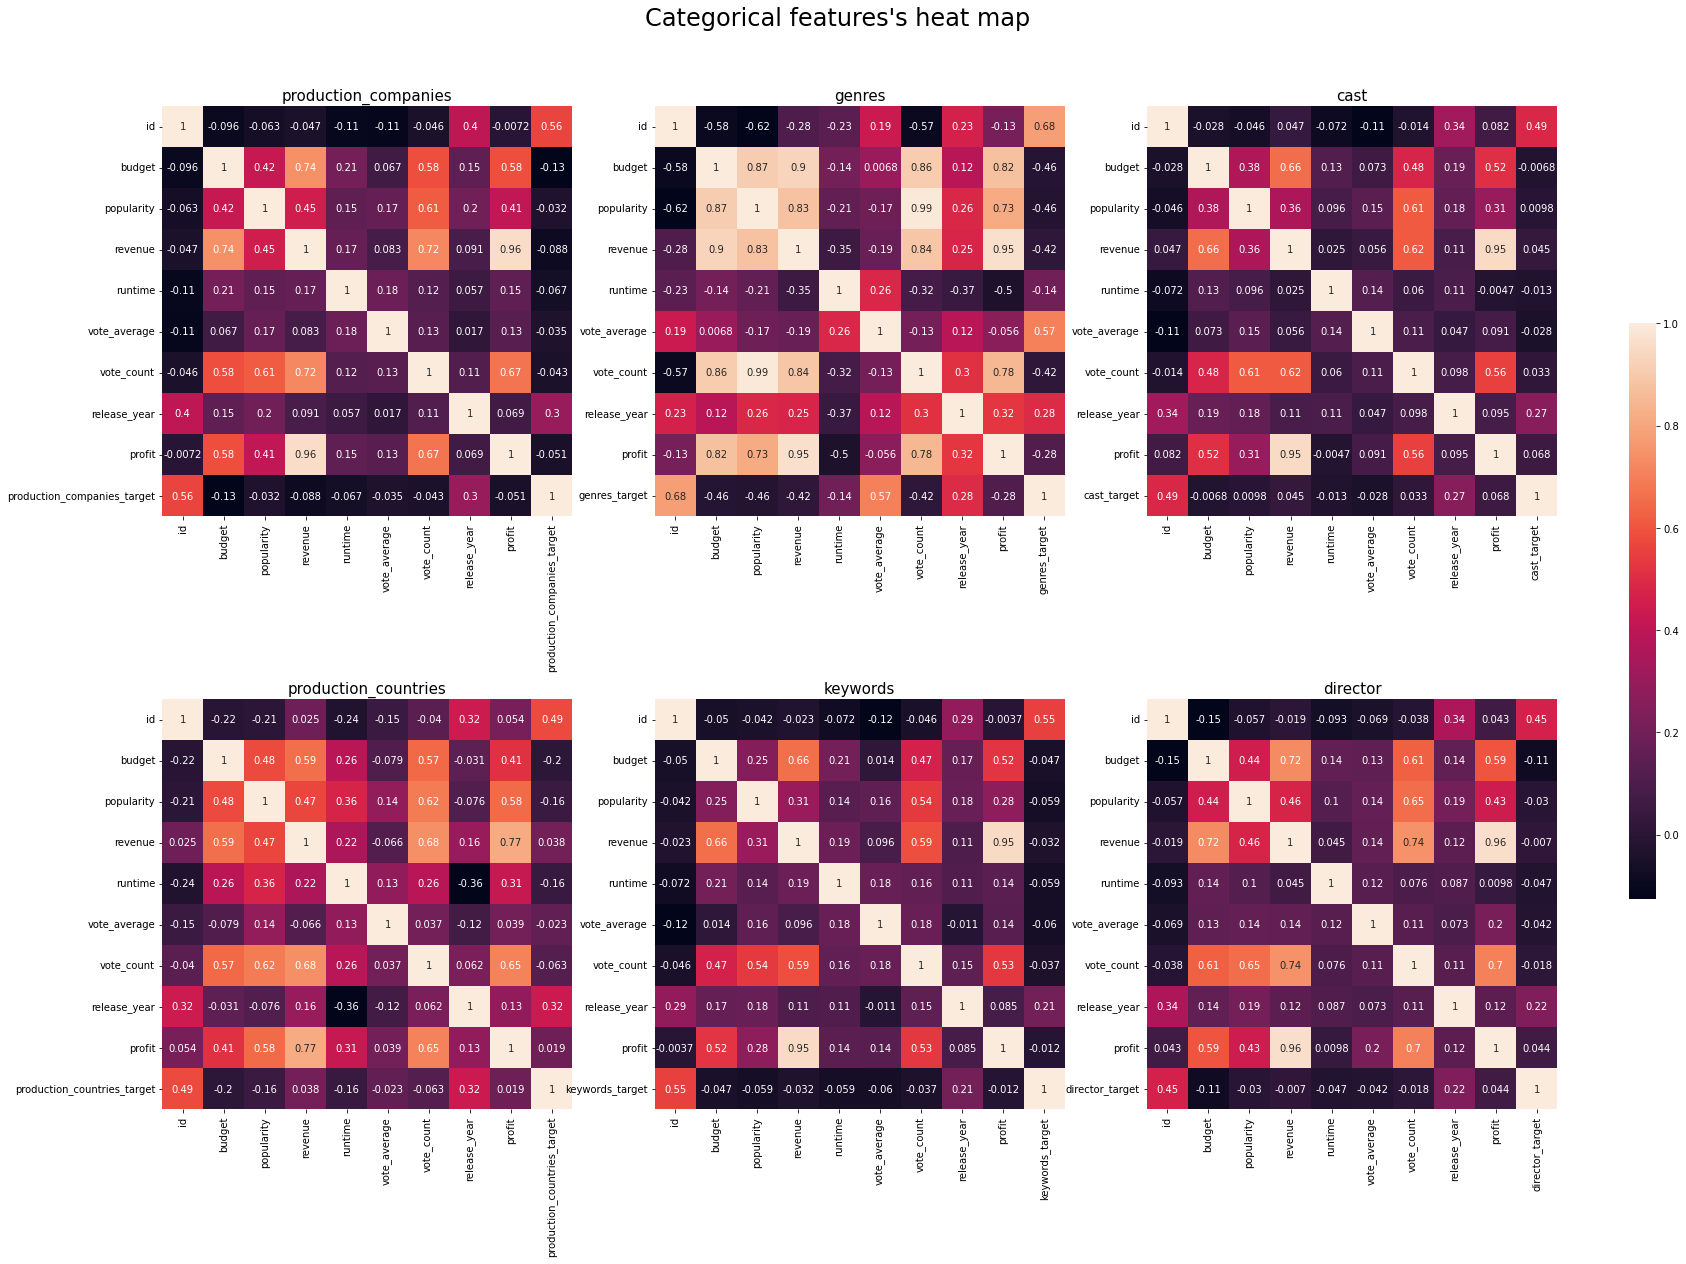

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(25, 20))
fig.suptitle("Categorical features's heat map", fontsize=24, y=0.92)
cbar_ax = fig.add_axes([.94, .3, .015, .4])
for i in range(len(cat_features)):
    sns.heatmap(get_cat_feature_heat_map(cat_features[i]), 
                square=True, annot=True, ax=axes[i//3, i%3],
                cbar=i == 0, cbar_ax=None if i else cbar_ax)
    axes[i//3, i%3].set_title(cat_features[i], fontsize=15)